In [165]:
import sys
from pandas import read_excel, pivot_table
from matplotlib import pyplot as plt
import numpy as np

In [92]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 5
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams["axes.unicode_minus"] = False

# Pandas 시각화 연구과제

## 문제 2

다음의 데이터는 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터의 일부이다.

| id | manufacturer | model | displ | year | cyl | trans      | drv | cty | hwy | fl | class   |
|----|--------------|-------|-------|------|-----|------------|-----|-----|-----|----|---------|
| 1  | audi         | a4    | 1.8   | 1999 | 4   | auto(l5)   | f   | 18  | 29  | p  | compact |
| 2  | audi         | a4    | 1.8   | 1999 | 4   | manual(m5) | f   | 21  | 29  | p  | compact |
| 3  | audi         | a4    | 2     | 2008 | 4   | manual(m6) | f   | 20  | 31  | p  | compact |
| 4  | audi         | a4    | 2     | 2008 | 4   | auto(av)   | f   | 21  | 30  | p  | compact |
| 5  | audi         | a4    | 2.8   | 1999 | 6   | auto(l5)   | f   | 16  | 26  | p  | compact |

전체 데이터는 아래의 URL을 통해 확인할 수 있다.

> https://data.hossam.kr/pydata/mpg.xlsx

데이터는 234 개의 행이 있으며, 각 행은 다음과 같은 변수로 구성되어 있다.

| 변수 | 설명 |
|--|--|
| manufacturer | 자동차 제조사 |
| model | 자동차 모델명 |
| displ | 자동차 배기량 |
| year | 제조년도 |
| cyl | 엔진 실린더 수 |
| trans | 자동차 트랜스미션 종류 |
| drv | 자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동 |
| cty | 도심 연비 (마일/갤론) |
| hwy | 고속도로 연비 (마일/갤론) |
| fl | 연료 종류 |
| class | 자동차 분류 |


In [93]:
origin = read_excel('https://data.hossam.kr/pydata/mpg.xlsx')
origin

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


##  문제 1
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

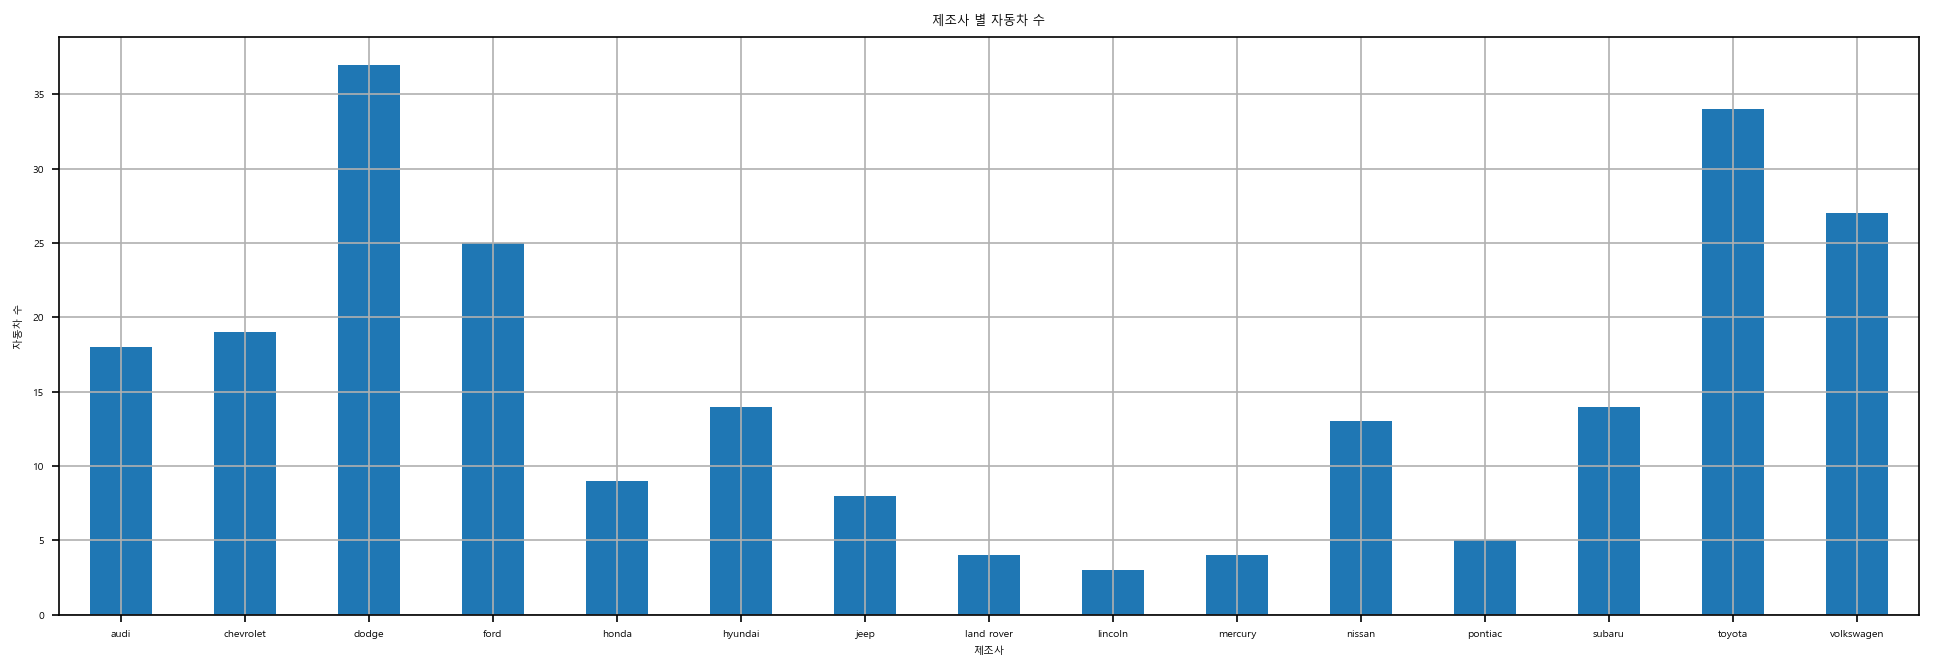

In [171]:
origin[['manufacturer','id']].groupby('manufacturer').count().plot.bar(rot=0,figsize=(16,5),legend=False)
plt.grid()
plt.title("제조사 별 자동차 수")
plt.xlabel("제조사")
plt.ylabel("자동차 수")
plt.savefig('문제1.png')
plt.show()
plt.close()


##  문제 2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

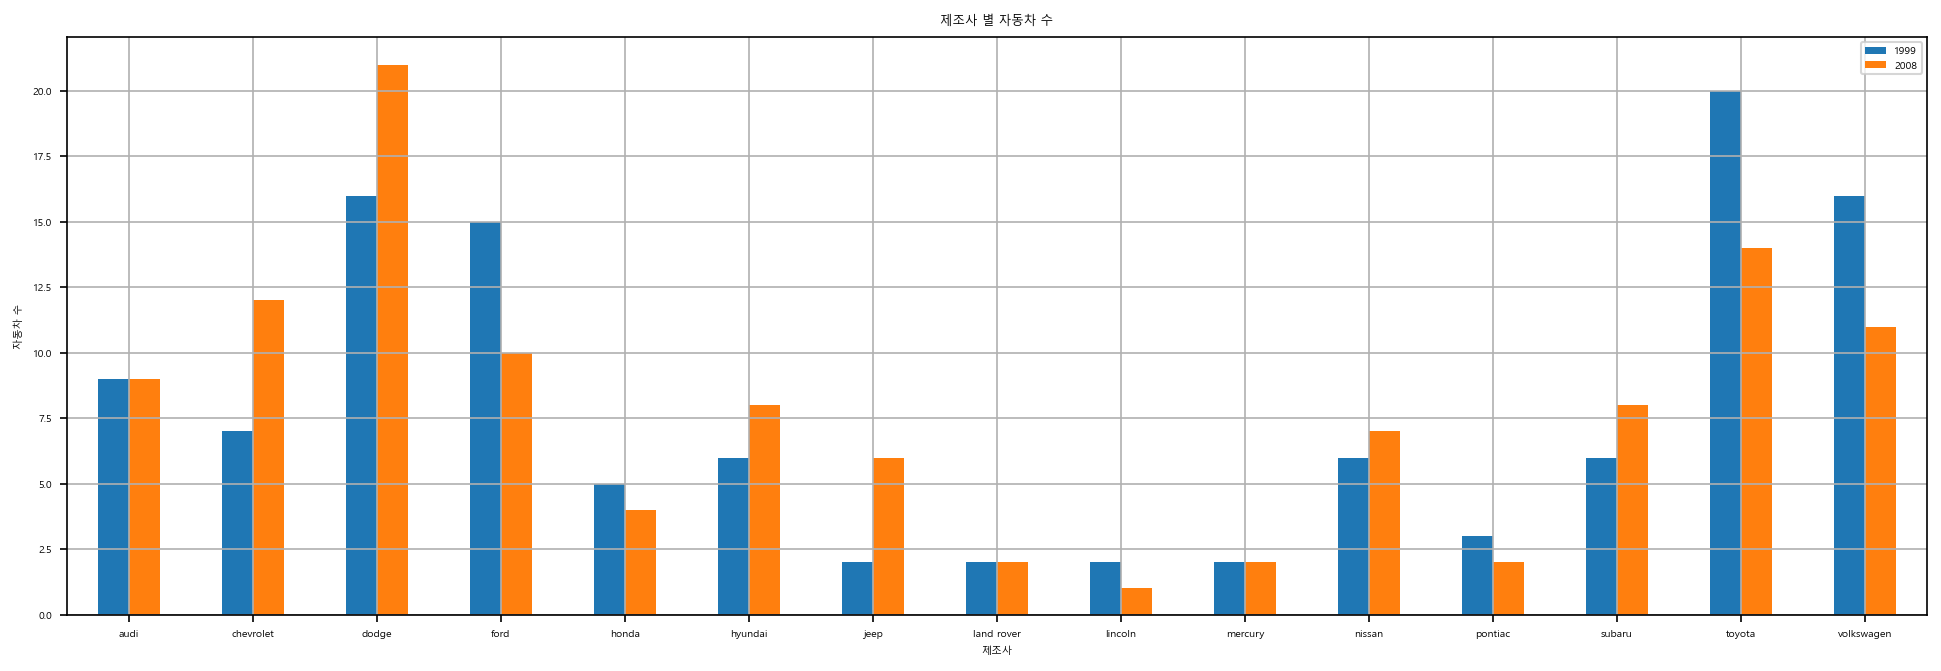

In [176]:
pivot_table(origin[['manufacturer','id','year']],
            index = 'manufacturer', columns = 'year',
            values = 'id', aggfunc='count').plot.bar(rot=0,figsize=(16,5))
plt.grid()
plt.legend()
plt.title("제조사 별 자동차 수")
plt.xlabel("제조사")
plt.ylabel("자동차 수")
plt.savefig('문제2.png')
plt.show()
plt.close()


In [186]:
origin[['manufacturer','id','year']].groupby('manufacturer')

##  문제 3

구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.


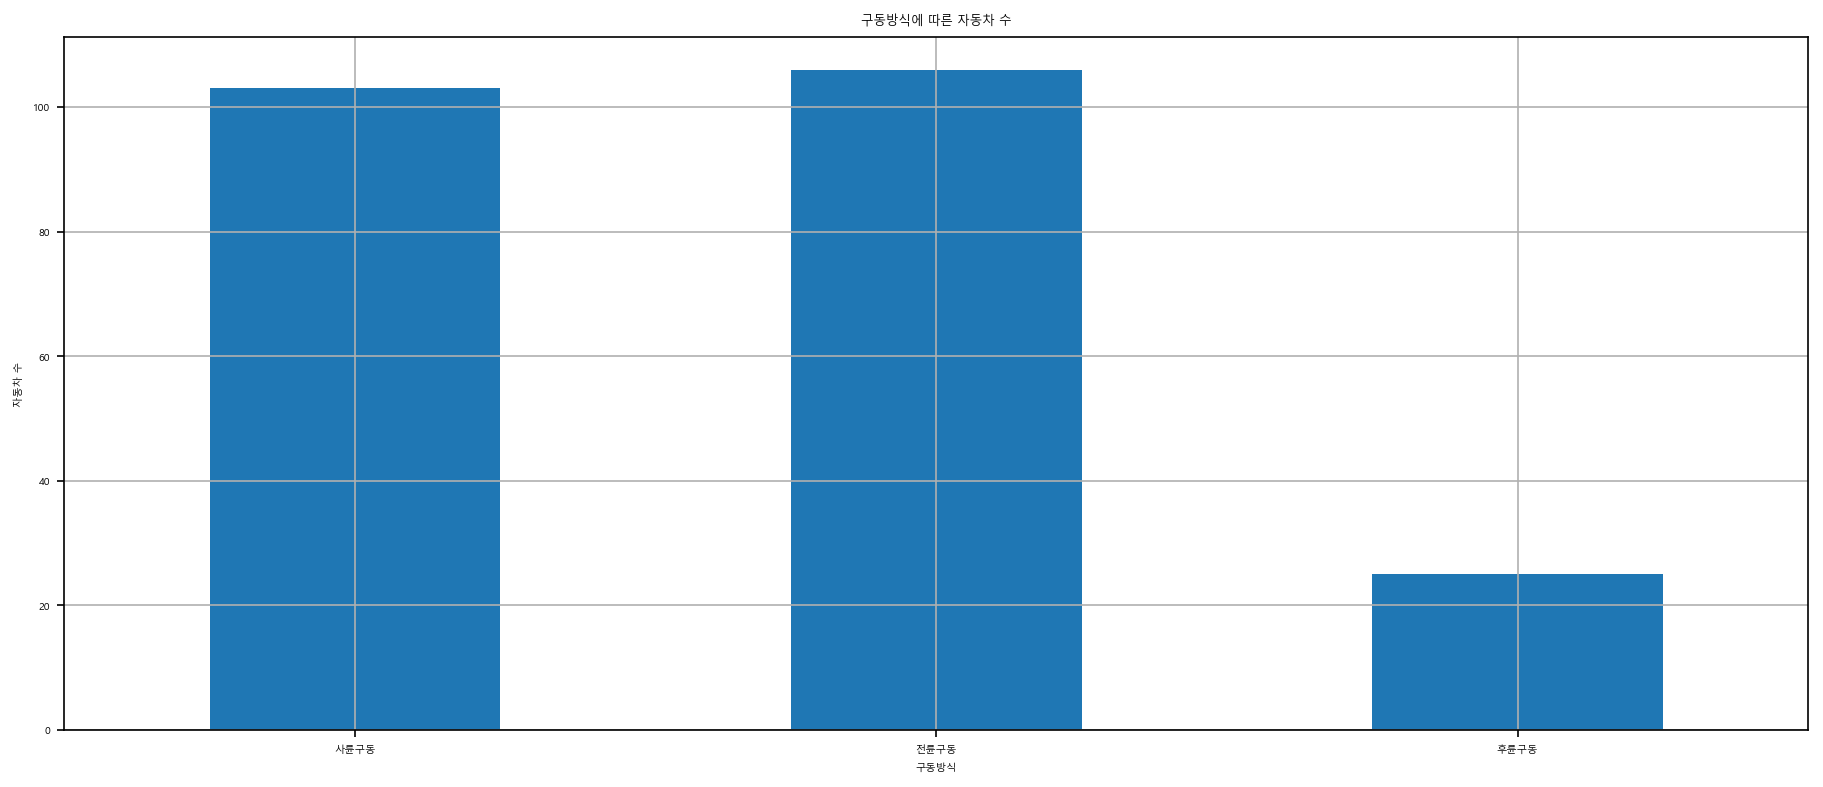

In [173]:
origin[['drv','id']].groupby('drv').count().plot.bar(rot=0,legend=False)
plt.grid()
plt.title("구동방식에 따른 자동차 수")
plt.xlabel("구동방식")
# f=전륜구동, r=후륜구동, 4=사륜구동
plt.xticks([0,1,2],['사륜구동','전륜구동', '후륜구동'])
plt.ylabel("자동차 수")
plt.savefig('문제3.png')
plt.show()
plt.close()


##  문제 4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

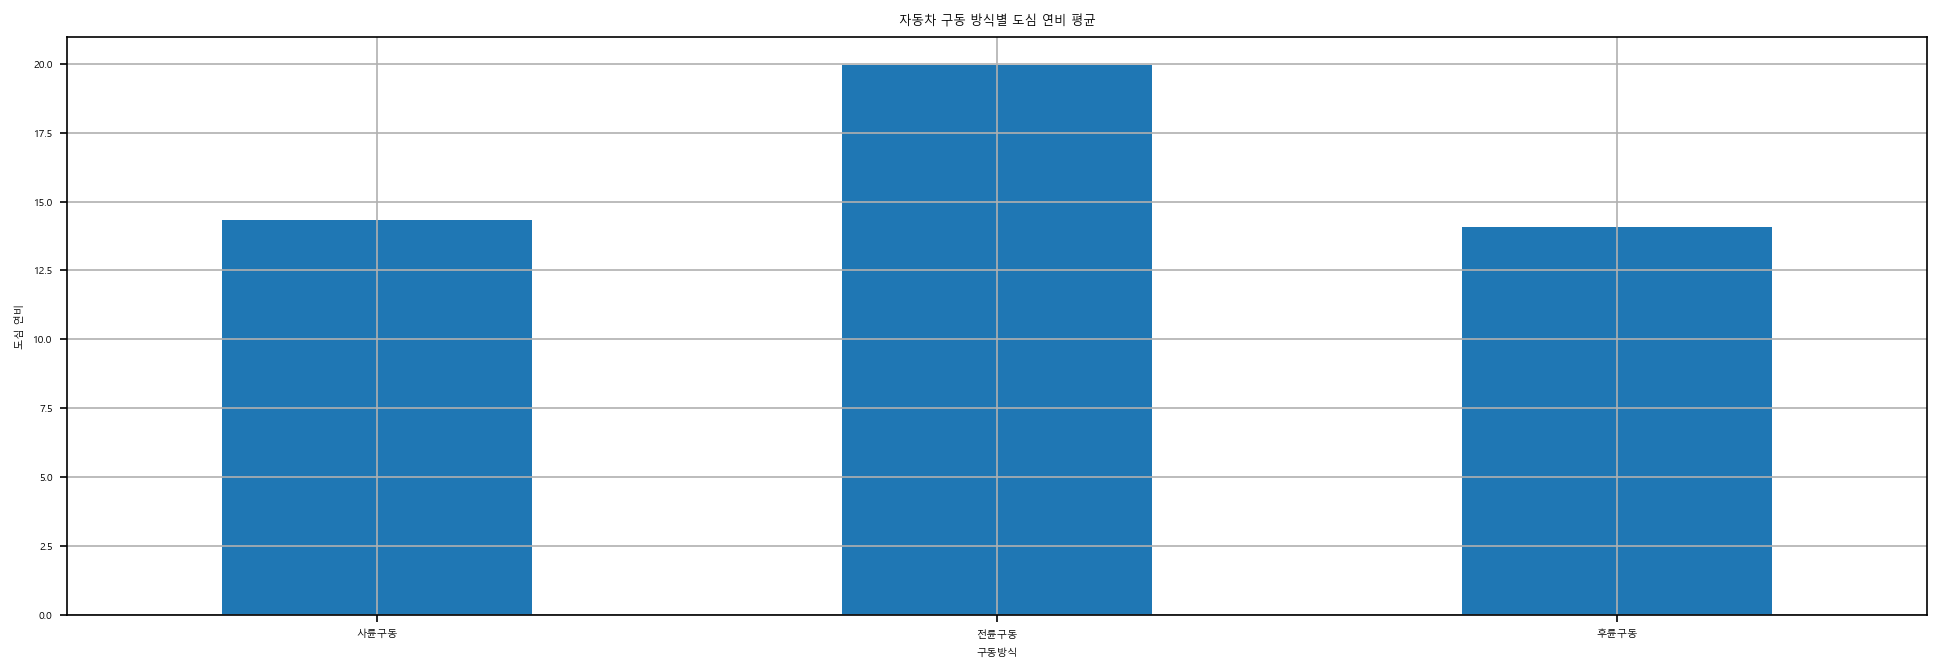

In [168]:
pivot_table(origin[['drv','cty']],
            index = 'drv' ,
            values = 'cty', aggfunc='mean').plot.bar(rot=0,figsize=(16,5),legend = False)
plt.grid()
plt.xticks([0,1,2],['사륜구동','전륜구동', '후륜구동'])
plt.title("자동차 구동 방식별 도심 연비 평균")
plt.xlabel("구동방식")
plt.ylabel("도심 연비")
plt.show()
plt.close()


##  문제 5

자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

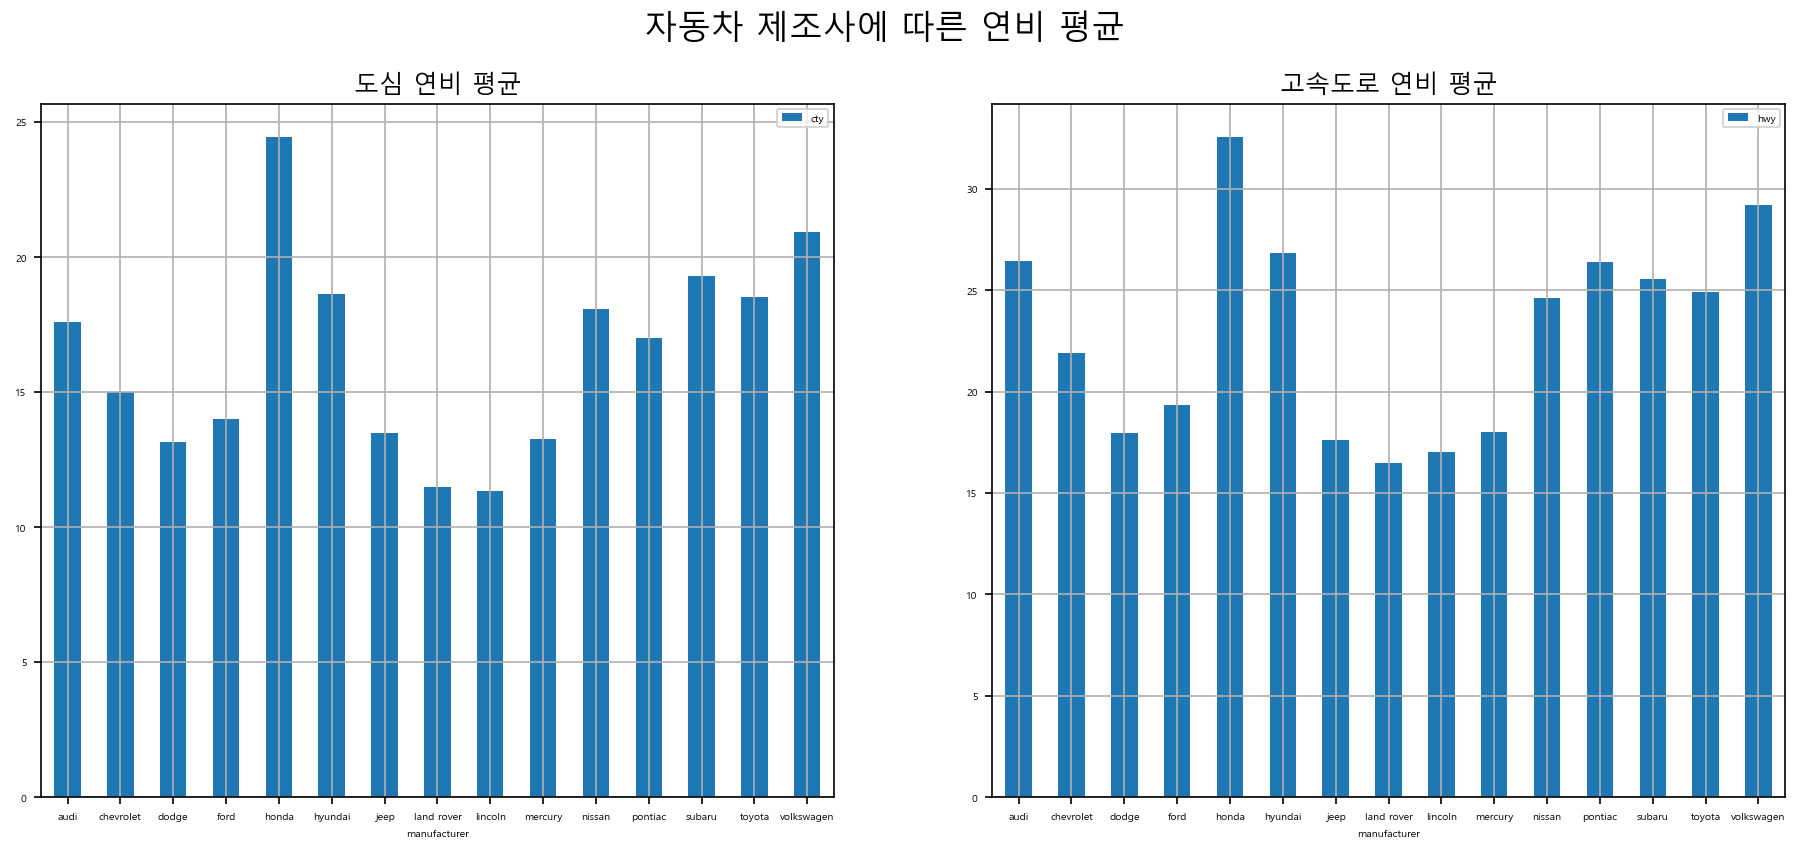

In [169]:
fig , (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('자동차 제조사에 따른 연비 평균', fontsize=16, color='#000000')
pvt1 = pivot_table(origin[['manufacturer','cty']],
            index = 'manufacturer', 
            values = 'cty', aggfunc='mean')
pvt2 = pivot_table(origin[['manufacturer','hwy']],
            index = 'manufacturer', 
            values = 'hwy', aggfunc='mean')
pvt1.plot(kind = 'bar',ax=ax1,rot=0)
ax1.title.set_text('도심 연비 평균')
ax1.title.set_fontsize(12)
ax1.grid()

pvt2.plot(kind = 'bar',ax=ax2,rot=0)
ax2.title.set_text("고속도로 연비 평균")
ax2.title.set_fontsize(12)
plt.grid()
plt.show()
plt.close()

##  문제 6

배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.

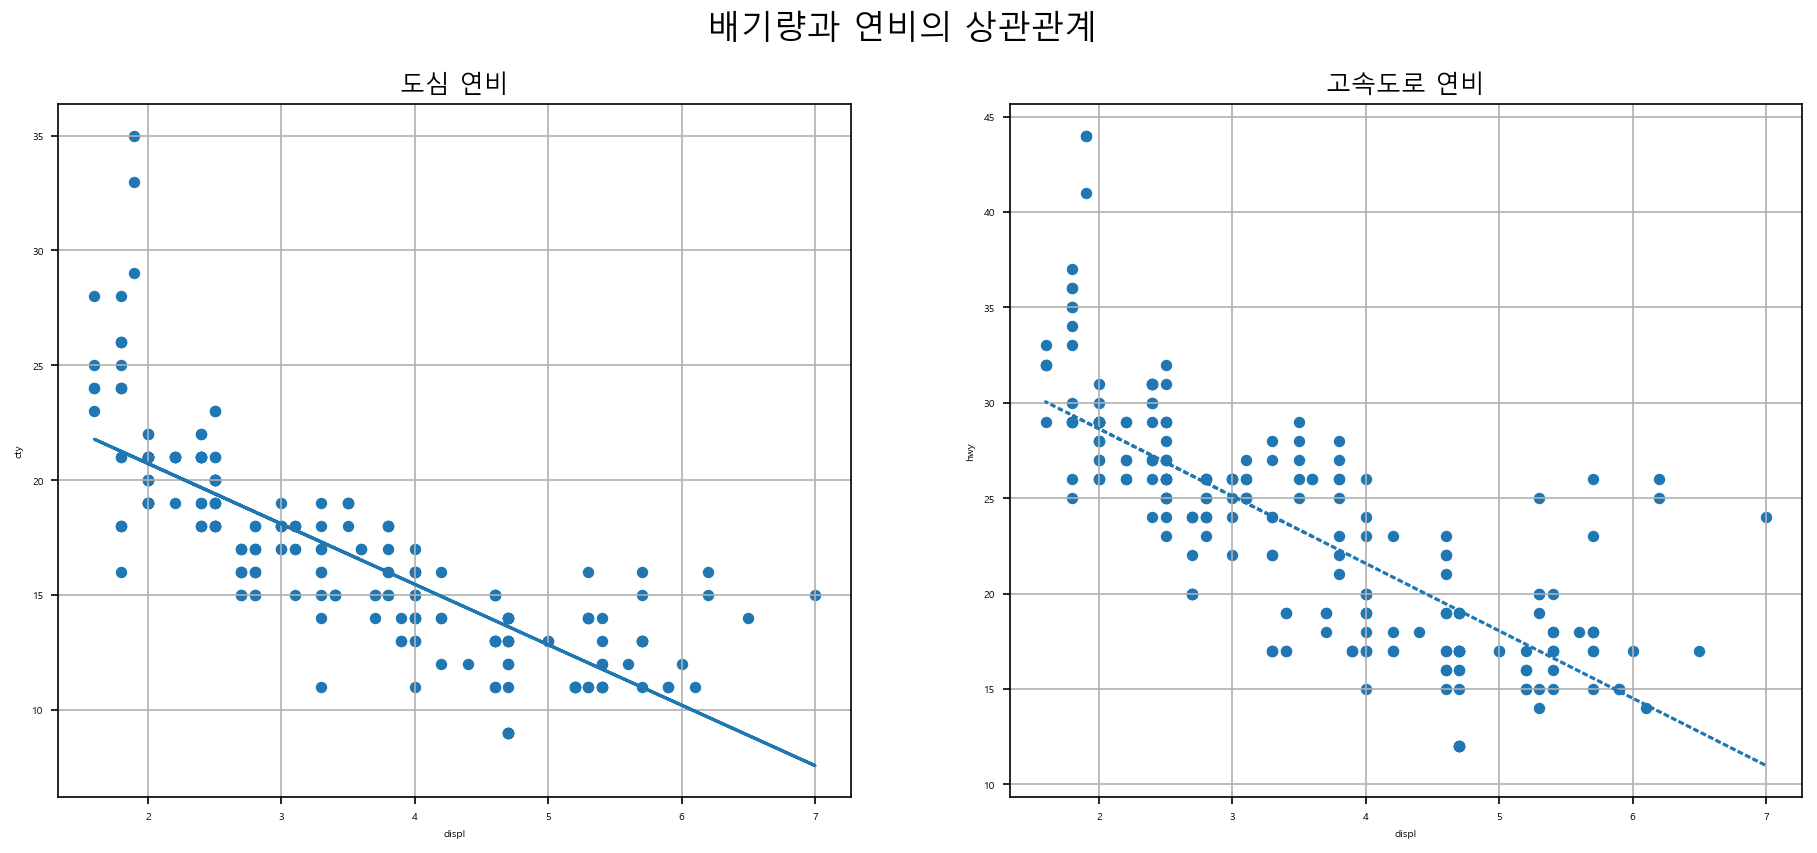

In [175]:
df = origin[['cty','displ','hwy']]
x = df['displ']
z1 = np.polyfit(x,df['cty'],1)
z2 = np.polyfit(x,df['hwy'],1)
f1 = np.poly1d(z1)
f2 = np.poly1d(z2)
y1=f1(x)
y2=f2(x)


fig , (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('배기량과 연비의 상관관계', fontsize=16, color='#000000')
df.plot.scatter(x='displ',y='cty', ax = ax1)
ax1.plot(x,y1,linestyle='-')
ax1.title.set_text('도심 연비')
ax1.title.set_fontsize(12)
ax1.grid()

df.plot.scatter(x='displ',y='hwy', ax = ax2)
ax2.plot(x,y2,linestyle=':')
ax2.title.set_text("고속도로 연비")
ax2.title.set_fontsize(12)
ax2.grid()
plt.savefig('문제6.png')
plt.show()
plt.close()

##  문제 7

철수는 새로 자동차를 구입하고자 한다.

철수가 고려하는 가장 중요한 조건은 연비이다.

철수는 자동차의 평균연비를 고속도로 연비와 도심연비에 대한 평균으로 계산하기로 하고 이를 확인하기 위해 전체 자동차에 대한 평균연비를 구한 후 이 값보다 높은 연비를 갖는 자동차의 경우 `Pass`를, 그렇지 않을 경우 `Fail`로 구분하기로 했다.

1. `Pass` 등급과 `Fail` 등급의 비율을 시각화 하라.
2. `Pass` 등급과 `Fail` 등급이 각각 몇 대씩 있는지 실제 수량을 시각화 하라.
3. `Pass` 등급을 받은 자동차들에 대해 연비가 높은 순으로 각각의 연비를 시각화 하라

위의 세가지 조건을 만족하는 1행 3열의 서브플롯을 생성하시오.


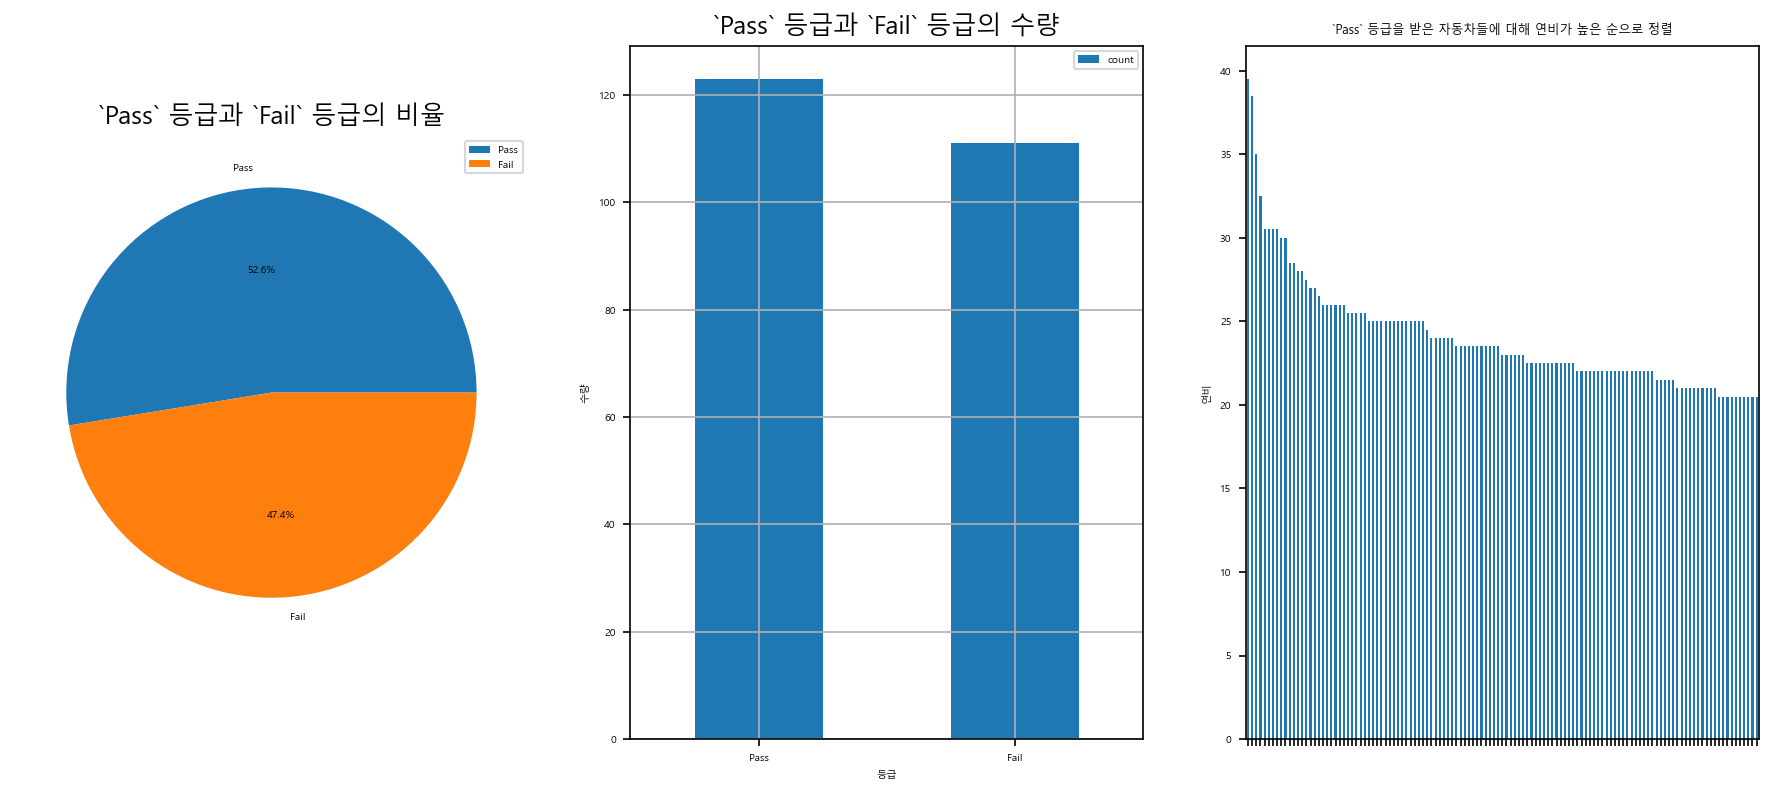

In [189]:
fig , (ax1, ax2, ax3) = plt.subplots(1,3)
# =================================================
# [1] `Pass` 등급과 `Fail` 등급의 비율을 시각화 하라.
# =================================================
df = origin.copy()
df['평균연비'] = (df['cty']+df['hwy'])/2
df['등급'] = np.where(df['평균연비']> df['평균연비'].mean(), 'Pass', 'Fail')
df['등급'].value_counts().plot.pie(autopct='%0.1f%%',legend=True,ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.title.set_text('`Pass` 등급과 `Fail` 등급의 비율')
ax1.title.set_fontsize(12)

# =======================================================================
# [2] `Pass` 등급과 `Fail` 등급이 각각 몇 대씩 있는지 실제 수량을 시각화 하라.
# =======================================================================


df['등급'].value_counts().plot(kind='bar',rot=0,ax=ax2)
ax2.title.set_text('`Pass` 등급과 `Fail` 등급의 수량')
ax2.title.set_fontsize(12)
ax2.legend()
ax2.set_ylabel('수량')
ax2.grid()

# =============================================================================
# [3] `Pass` 등급을 받은 자동차들에 대해 연비가 높은 순으로 각각의 연비를 시각화 하라
# =============================================================================

r1 = df.query('등급 == "Pass"').reset_index(drop=True)
r2 = r1.sort_values('평균연비',ascending = False).reset_index(drop=True)
r2['평균연비'].plot(kind='bar',rot=0,ax=ax3)
ax3.title.set_text('`Pass` 등급을 받은 자동차들에 대해 연비가 높은 순으로 정렬')
ax3.set_ylabel('연비')
ax3.set_xticklabels('')
plt.savefig('문제7.png')
plt.show()
plt.close()